## Importing Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [12]:
import tensorflow as tf

# Define dataset directory
dataset_path = "Plant_Disease_Dataset/Plant_Disease_Dataset/train"  # Use '/' instead of '\'

# Load training dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_path,
    labels="inferred",  # Automatically assigns labels based on subfolder names
    label_mode="categorical",  # Multi-class classification
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32,  # Process images in batches of 32
    color_mode="rgb",  # Load images in RGB format
    shuffle=True,  # Shuffle images for better training
    seed=42,  # Set seed for reproducibility
    validation_split=None,  # No validation split in training set
    subset=None,  # Load entire dataset
    interpolation="bilinear",  # Resize using bilinear interpolation
    follow_links=False,  # Do not follow symbolic links
    crop_to_aspect_ratio=False  # Do not crop images
)

# Display dataset details
print(f"Training set loaded with {len(training_set)} batches.")


Found 70295 files belonging to 38 classes.
Training set loaded with 2197 batches.


### Validation Image Preprocessing

In [13]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_path,
    labels="inferred",  # Automatically assigns labels based on folder names
    label_mode="categorical",  # Multi-class classification
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32,  # Process images in batches of 32
    color_mode="rgb",  # Load images in RGB format
    shuffle=True,  # Shuffle dataset
    seed=42,  # Set seed for reproducibility
    validation_split=0.2,  # Use 20% of data for validation
    subset="validation",  # Load validation subset
    interpolation="bilinear",  # Resize using bilinear interpolation
    follow_links=False,  # Do not follow symbolic links
    crop_to_aspect_ratio=False  # Do not crop images
)

Found 70295 files belonging to 38 classes.
Using 14059 files for validation.


In [14]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[167.5  164.75 131.75]
   [163.   164.25 130.  ]
   [160.5  169.25 134.5 ]
   ...
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]]

  [[174.25 167.75 138.5 ]
   [150.75 147.75 117.  ]
   [167.75 171.5  138.5 ]
   ...
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]]

  [[164.5  158.5  130.  ]
   [156.   151.75 122.75]
   [162.5  162.25 132.5 ]
   ...
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]]

  ...

  [[  1.     1.     1.  ]
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]
   ...
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]]

  [[  1.     1.     1.  ]
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]
   ...
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]]

  [[  1.     1.     1.  ]
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]
   ...
   [  1.     1.     1.  ]
   [  1.     1.     1.  ]
   [  1.     1.     

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout 
from tensorflow.keras.models import Sequential


In [16]:
model = Sequential()

In [17]:
## Building Convolution Layer

In [18]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [23]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [25]:
model.add(Flatten())

In [24]:
model.add(Dense(units=1500,activation='relu'))

In [26]:
model.add(Dropout(0.4))

In [27]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [29]:
import tensorflow as tf

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adam optimizer with a small learning rate
    loss="categorical_crossentropy",  # Suitable for multi-class classification
    metrics=["accuracy"]  # Monitor accuracy during training
)

# Display confirmation
print("Model compiled successfully.")


Model compiled successfully.


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2, 2, 1500)     │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │       228,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,709,762 (21.78 MB)

 Trainable params: 5,709,762 (21.78 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [31]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1440/2197 ━━━━━━━━━━━━━━━━━━━━ 9:58 790ms/step - accuracy: 0.2919 - loss: 2.5533

KeyboardInterrupt: 

## Model Evaluation

In [ ]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 75s 34ms/step - loss: 0.0600 - accuracy: 0.9810


In [ ]:
print(train_loss,train_acc)

0.06002769619226456 0.9810370802879333


In [ ]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 19s 34ms/step - loss: 0.1969 - accuracy: 0.9508


In [ ]:
print(val_loss,val_acc)

0.19692450761795044 0.9507739543914795


### Saving Model

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

{'loss': [1.3571914434432983,
  0.5049574971199036,
  0.32880619168281555,
  0.2558952867984772,
  0.2005671113729477,
  0.17008167505264282,
  0.14465591311454773,
  0.13137802481651306,
  0.1188822016119957,
  0.10284651070833206],
 'accuracy': [0.6019062399864197,
  0.8420228958129883,
  0.8974180221557617,
  0.9207767248153687,
  0.9370794296264648,
  0.9480617642402649,
  0.9565118551254272,
  0.9614766240119934,
  0.9658724069595337,
  0.970694899559021],
 'val_loss': [0.4827156960964203,
  0.3038451373577118,
  0.40001180768013,
  0.24579212069511414,
  0.2028026580810547,
  0.21648111939430237,
  0.2028176635503769,
  0.49215683341026306,
  0.20546308159828186,
  0.19692446291446686],
 'val_accuracy': [0.8453221321105957,
  0.9008650183677673,
  0.8770202398300171,
  0.9245390295982361,
  0.9382540583610535,
  0.9399043917655945,
  0.9442863464355469,
  0.884987473487854,
  0.9503186941146851,
  0.9507739543914795]}

In [ ]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['val_accuracy']

[0.8453221321105957,
 0.9008650183677673,
 0.8770202398300171,
 0.9245390295982361,
 0.9382540583610535,
 0.9399043917655945,
 0.9442863464355469,
 0.884987473487854,
 0.9503186941146851,
 0.9507739543914795]

### Accuracy Visualization

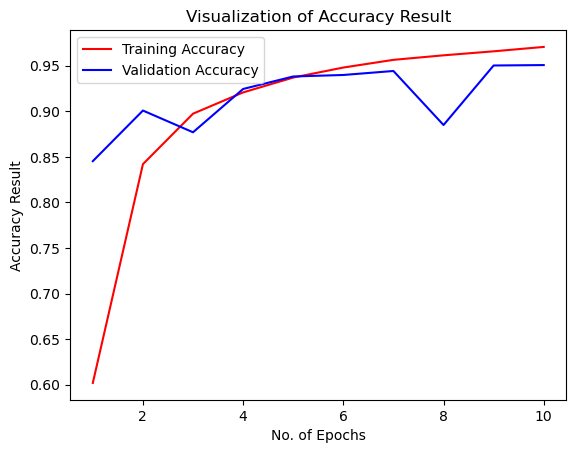

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 18s 32ms/step


(array([[9.1813737e-01, 9.9658419e-06, 6.3719485e-10, ..., 2.1487567e-19,
         4.2186408e-15, 8.4863258e-17],
        [9.9213529e-01, 8.3770821e-05, 1.0463309e-09, ..., 2.2178883e-14,
         2.4500402e-13, 5.3247652e-13],
        [1.0000000e+00, 7.3905543e-10, 1.6627438e-10, ..., 1.8883091e-21,
         6.5387534e-15, 1.4738160e-16],
        ...,
        [1.7899348e-08, 7.0953979e-13, 9.5409533e-08, ..., 7.3096293e-11,
         1.4640018e-11, 9.9997282e-01],
        [1.5228104e-10, 4.3815273e-16, 5.6736077e-10, ..., 1.9937728e-12,
         5.1355627e-13, 1.0000000e+00],
        [1.1665089e-28, 2.1659921e-34, 1.4899352e-27, ..., 1.1626555e-31,
         5.2377769e-26, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

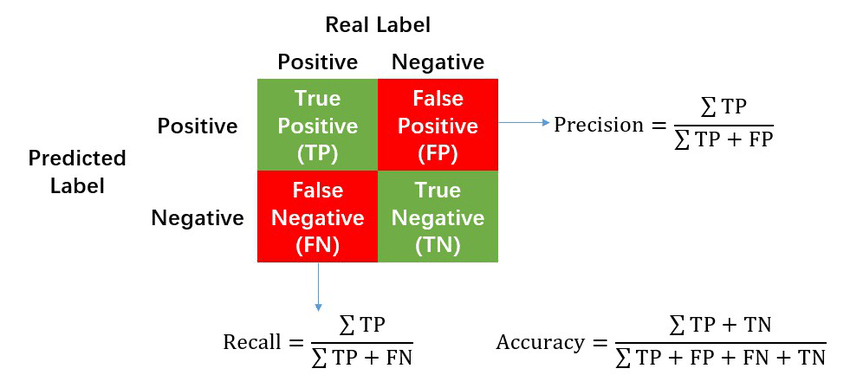

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.94      0.93       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.93      0.94       440
                                   Apple___healthy       0.95      0.89      0.92       502
                               Blueberry___healthy       0.95      0.96      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.94      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.95      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.91      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.93      0.

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[475,   5,   1, ...,   0,   1,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   0, 408, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 479,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  2,   0,   2, ...,   0,   0, 474]])

### Confusion Matrix Visualization

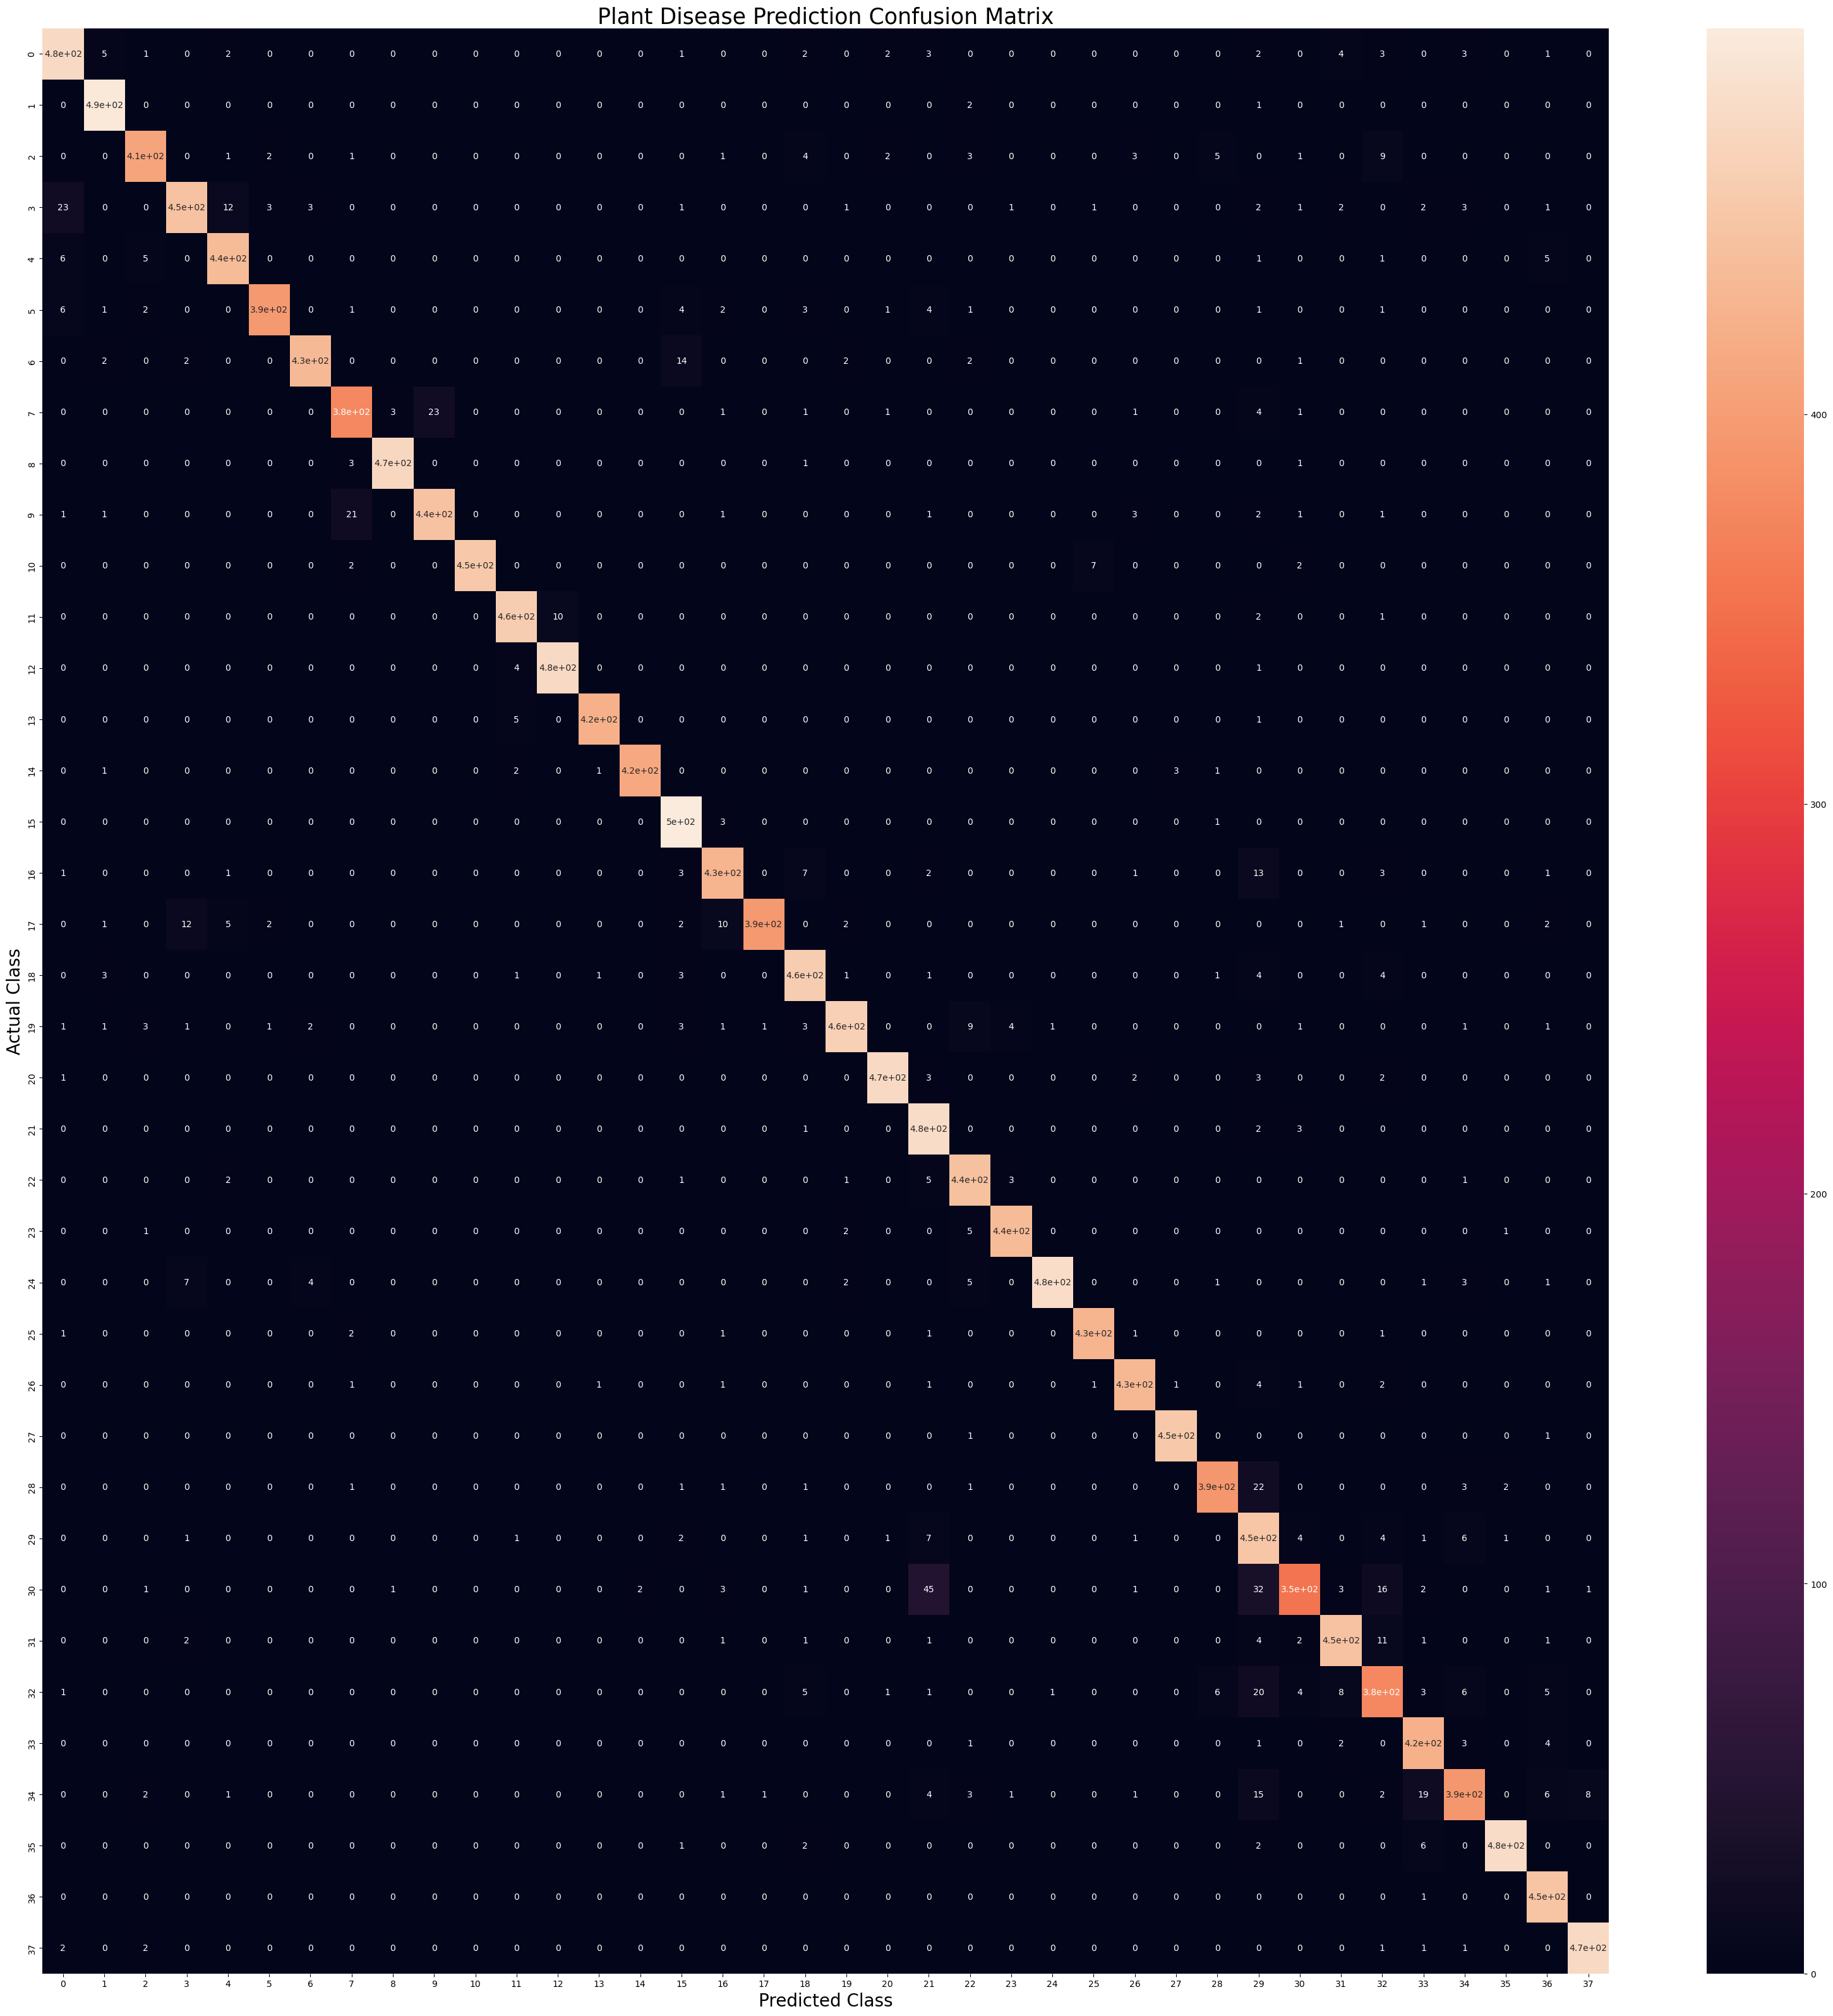

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()